In [4]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


# Simple CNN Model With 10 Classes And 10000 Images Per Class

In [2]:
import numpy as np
import os
from urllib.request import urlretrieve

# Choose 10 classes (modify this list as needed)
classes = ['apple', 'banana', 'cat', 'dog', 'house',
          'tree', 'car', 'bicycle', 'clock', 'cloud']

# Download dataset (approx 50MB)
base_url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"

def download_data(class_name):
    url = base_url + class_name.replace(' ', '%20') + '.npy'
    path = f'{class_name}.npy'
    if not os.path.exists(path):
        urlretrieve(url, path)
    return np.load(path, allow_pickle=True)

# Load 10k samples per class
samples_per_class = 10000
test_size = 0.2  # 20% test data

X = []
y = []

for i, class_name in enumerate(classes):
    data = download_data(class_name)
    data = data[:samples_per_class] / 255.0  # Normalize
    labels = np.full((samples_per_class), i)

    split_idx = int(len(data) * (1 - test_size))
    X_train, X_test = data[:split_idx], data[split_idx:]
    y_train, y_test = labels[:split_idx], labels[split_idx:]

    if i == 0:
        X_train_all = X_train
        X_test_all = X_test
        y_train_all = y_train
        y_test_all = y_test
    else:
        X_train_all = np.concatenate((X_train_all, X_train))
        X_test_all = np.concatenate((X_test_all, X_test))
        y_train_all = np.concatenate((y_train_all, y_train))
        y_test_all = np.concatenate((y_test_all, y_test))

# Reshape for CNN input (28x28x1)
X_train_all = X_train_all.reshape(-1, 28, 28, 1)
X_test_all = X_test_all.reshape(-1, 28, 28, 1)

In [3]:
from tensorflow.keras import layers, models, callbacks

def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (2,2), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (2,2), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (2,2), activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

model = create_model((28, 28, 1), len(classes))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 27, 27, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 453,226 (1.73 MB)

 Trainable params: 452,778 (1.73 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Data augmentation
# train_datagen = ImageDataGenerator(
#     rotation_range=15,
#     zoom_range=0.1,
#     width_shift_range=0.1,
#     height_shift_range=0.1)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def conservative_augmentation(image):
    """Balanced augmentation preserving class identity"""
    # Controlled Gaussian noise
    if np.random.rand() < 0.2:  # 20% chance
        noise = np.random.normal(0, 0.03, image.shape)
        image = np.clip(image + noise, 0, 1)

    # Mild salt & pepper (reduced impact)
    if np.random.rand() < 0.15:  # 15% chance
        num_pixels = int(0.005 * image.shape[0] * image.shape[1])  # 0.5% pixels
        coords = np.random.randint(0, image.shape[1], size=(num_pixels, 2))
        for y, x in coords:
            if np.random.rand() < 0.5:
                image[y, x] = 1  # Salt
            else:
                image[y, x] = 0  # Pepper

    return image

# Optimized Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=12,          # ±12 degrees (was 25)
    zoom_range=0.1,            # ±10% zoom (was 15%)
    fill_mode='constant',      # Black background
    preprocessing_function=conservative_augmentation
)

# Keep the rest of your code the same
# train_datagen = ImageDataGenerator(
#     rotation_range=25,
#     zoom_range=[0.85, 1.15],
#     width_shift_range=0.15,
#     height_shift_range=0.15,
#     shear_range=0.2,
#     horizontal_flip=True,
#     brightness_range=[0.8, 1.2],
#     fill_mode='constant',
#     # preprocessing_function=random_augmentation
# )

# train_datagen = ImageDataGenerator(
#     rotation_range=10,
#     zoom_range=0.1,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     preprocessing_function=lambda x: x  # Remove custom augmentation temporarily
# )

In [7]:
# # Callbacks
# early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
# reduce_lr = callbacks.ReduceLROnPlateau(factor=0.2, patience=3)

# Enhanced callbacks
early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    min_delta=0.001
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)
# Training
batch_size = 128
history = model.fit(
    train_datagen.flow(X_train_all, y_train_all, batch_size=batch_size),
    epochs=30,
    validation_data=(X_test_all, y_test_all),
    callbacks=[early_stop, reduce_lr],
    verbose=1)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.7522 - loss: 0.7583 - val_accuracy: 0.9180 - val_loss: 0.2654 - learning_rate: 0.0010
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.8995 - loss: 0.3216 - val_accuracy: 0.9230 - val_loss: 0.2390 - learning_rate: 0.0010
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 183ms/step - accuracy: 0.9130 - loss: 0.2738 - val_accuracy: 0.9321 - val_loss: 0.2095 - learning_rate: 0.0010
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.9220 - loss: 0.2423 - val_accuracy: 0.9372 - val_loss: 0.2077 - learning_rate: 0.0010
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 120s 191ms/step - accuracy: 0.9269 - loss: 0.2250 - val_accuracy: 0.9358 - val_loss: 0.1978 - learning_rate: 0.0010
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 187ms/step - accuracy: 0.9295 - loss: 0.2159 - val_accuracy: 0.9395 - val_loss: 0.1888 - learning_rate: 0.0010
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - accura

Test accuracy: 0.9514


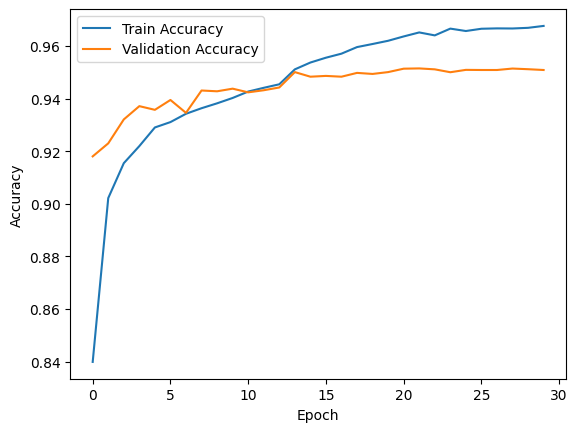

In [8]:
# Evaluate final model
test_loss, test_acc = model.evaluate(X_test_all, y_test_all, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
model.save('a_little_overfit_quickdraw_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


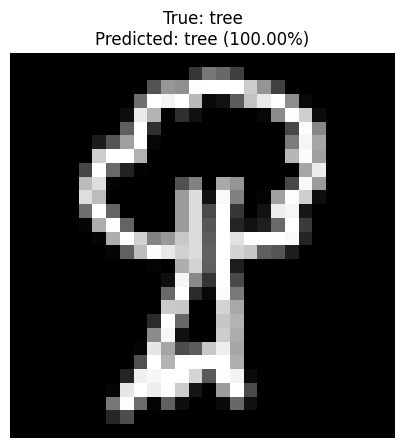


Prediction result: {'true_class': 'tree', 'predicted_class': 'tree', 'confidence': 1.0}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


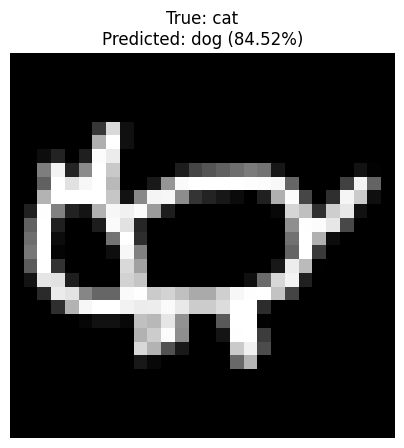


Prediction result: {'true_class': 'cat', 'predicted_class': 'dog', 'confidence': 0.8452103734016418}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


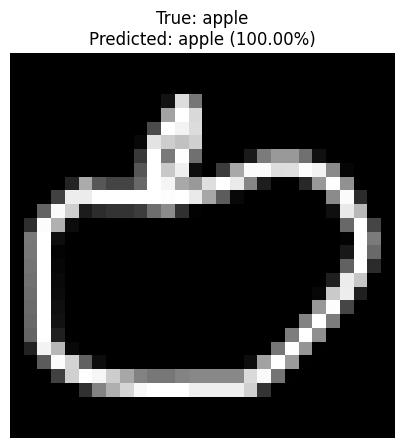


Prediction result: {'true_class': 'apple', 'predicted_class': 'apple', 'confidence': 1.0}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


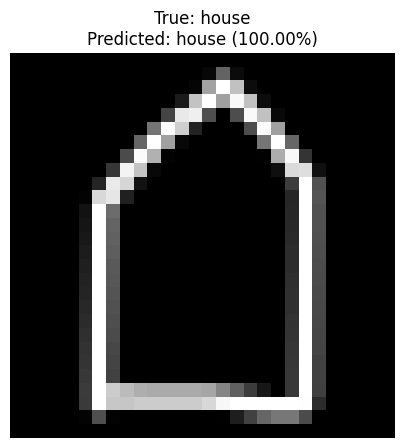


Prediction result: {'true_class': 'house', 'predicted_class': 'house', 'confidence': 1.0}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


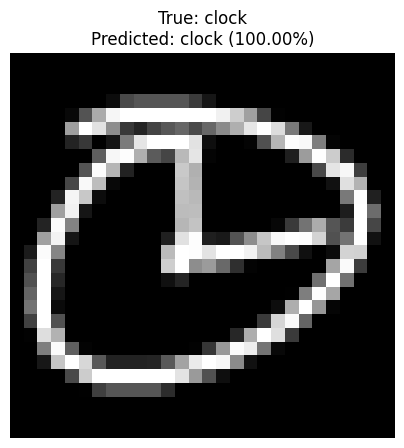


Prediction result: {'true_class': 'clock', 'predicted_class': 'clock', 'confidence': 1.0}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


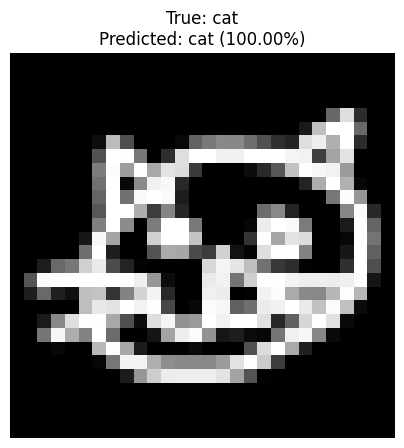


Prediction result: {'true_class': 'cat', 'predicted_class': 'cat', 'confidence': 1.0}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


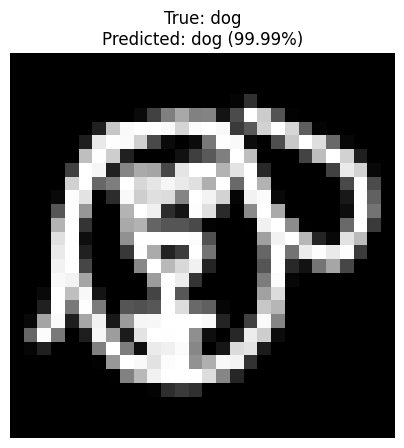


Prediction result: {'true_class': 'dog', 'predicted_class': 'dog', 'confidence': 0.9999494552612305}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


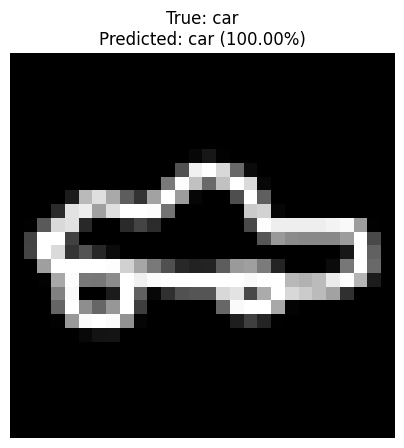


Prediction result: {'true_class': 'car', 'predicted_class': 'car', 'confidence': 1.0}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


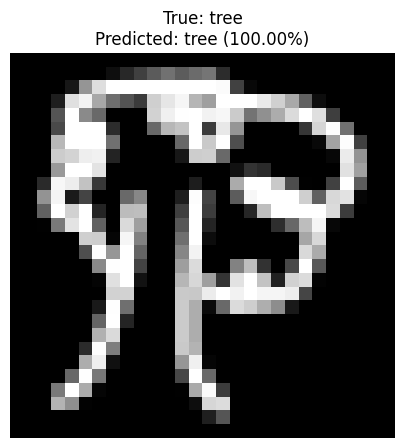


Prediction result: {'true_class': 'tree', 'predicted_class': 'tree', 'confidence': 1.0}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


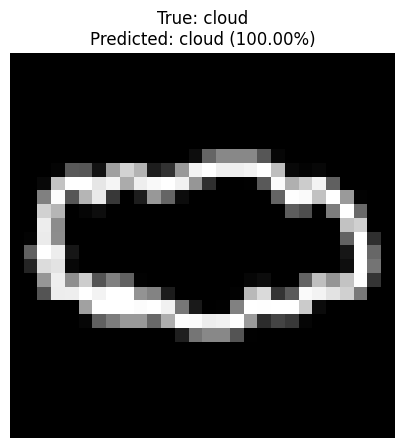


Prediction result: {'true_class': 'cloud', 'predicted_class': 'cloud', 'confidence': 1.0}


In [10]:
import random
# Select a random test image
def predict_random_image():
    # Pick a random test sample
    idx = random.randint(0, len(X_test_all) - 1)
    test_image = X_test_all[idx]
    true_label = y_test_all[idx]

    # Add batch dimension and predict
    prediction = model.predict(np.expand_dims(test_image, axis=0))[0]
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction)

    # Display results
    plt.figure(figsize=(5,5))
    plt.imshow(test_image.squeeze(), cmap='gray')
    plt.title(f"True: {classes[true_label]}\nPredicted: {classes[predicted_label]} ({confidence:.2%})")
    plt.axis('off')
    plt.show()

    return {
        'true_class': classes[true_label],
        'predicted_class': classes[predicted_label],
        'confidence': float(confidence)
    }

# Run prediction
for i in range(10):
  result = predict_random_image()
  print(f"\nPrediction result: {result}")